In [34]:
## import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## carregar o ficheiro de jogos para um dataframe do pandas
data = pd.read_csv('../files/View_data_nullZero.csv')



data.head(2)     #Mostra as primeiras n linhas do conjunto de dados
data.tail(5)     #Mostra as últimas n linhas do conjunto de dados


,id_match_competition,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,...,t1_h2h_home_total10_fl_match_win,t1_h2h_home_total10_fl_match_draw,t1_h2h_home_total10_fl_match_lost,t2_h2h_away_total5_fl_match_win,t2_h2h_away_total5_fl_match_draw,t2_h2h_away_total5_fl_match_lost,t2_h2h_away_total10_fl_match_win,t2_h2h_away_total10_fl_match_draw,t2_h2h_away_total10_fl_match_lost,t1_fl_match_win
43818,1069,1,4,0,3,6,1,3,1,1,...,0,1,0,0,1,0,0,1,0,0
43819,243,2,1,2,4,2,4,2,1,2,...,0,0,0,0,0,0,0,0,0,1
43820,214,1,3,1,5,3,2,3,0,2,...,2,2,0,0,2,2,0,2,2,1
43821,257,1,1,3,1,4,5,1,2,2,...,1,2,2,2,2,1,2,2,1,0
43822,8613,3,2,0,7,2,1,4,0,1,...,0,0,1,1,0,0,1,0,0,0


In [35]:
data.shape

(43823, 50)

In [36]:
x = data.iloc[:,1:50] # 1t for rows and second for columns
x


,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,t2_all_total10_fl_match_win,...,t1_h2h_home_total10_fl_match_win,t1_h2h_home_total10_fl_match_draw,t1_h2h_home_total10_fl_match_lost,t2_h2h_away_total5_fl_match_win,t2_h2h_away_total5_fl_match_draw,t2_h2h_away_total5_fl_match_lost,t2_h2h_away_total10_fl_match_win,t2_h2h_away_total10_fl_match_draw,t2_h2h_away_total10_fl_match_lost,t1_fl_match_win
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43818,1,4,0,3,6,1,3,1,1,3,...,0,1,0,0,1,0,0,1,0,0
43819,2,1,2,4,2,4,2,1,2,2,...,0,0,0,0,0,0,0,0,0,1
43820,1,3,1,5,3,2,3,0,2,5,...,2,2,0,0,2,2,0,2,2,1
43821,1,1,3,1,4,5,1,2,2,4,...,1,2,2,2,2,1,2,2,1,0


In [37]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [38]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 1, 2, 0], dtype=int32)

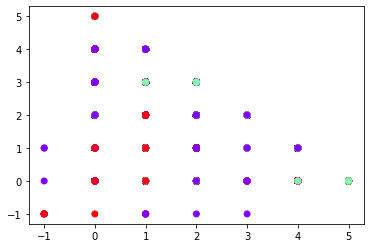

In [39]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['t1_all_total5_fl_match_win'],data_with_clusters['t1_all_total5_fl_match_draw'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

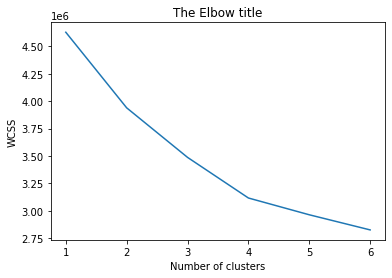

In [40]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')